# Tales from the Crypto

---


## 1. Sentiment Analysis

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [225]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\akinnubisa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [226]:
# Read your api key environment variable
load_dotenv("envi.env")
api_key = os.getenv("news_api")
type(api_key)

str

In [227]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)
newsapi

In [228]:
# Fetch the Bitcoin news articles
bitcoin_news_en = newsapi.get_everything(
    q="Bitcoin",
    language="en"
)

# Show the total number of news
bitcoin_news_en["totalResults"]

8554

In [229]:
# Fetch the Ethereum news articles
ethereum_news_en = newsapi.get_everything(
    q="Ethereum",
    language="en"
)

# Show the total number of news
ethereum_news_en["totalResults"]

2134

In [230]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "Compound", "Negative", "Neutral","Positive","text" ]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,date,Compound,Negative,Neutral,Positive,text
0,2021-03-15,-0.5574,0.110,0.890,0.000,One of the strictest crackdowns worldwide\r\nP...
1,2021-03-16,-0.5106,0.142,0.858,0.000,The hacker behind last years big Twitter hack\...
2,2021-02-26,0.6369,0.000,0.887,0.113,Some things are best left a mystery at least a...
3,2021-03-03,0.0000,0.000,0.000,0.000,
4,2021-02-25,0.8316,0.000,0.754,0.246,TL;DR: Enter the The Complete Bitcoin (BTC) In...


In [231]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "Compound", "Negative", "Neutral","Positive","text" ]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,date,Compound,Negative,Neutral,Positive,text
0,2021-03-15,0.0000,0.000,1.000,0.000,Famed auction house Christies just sold its fi...
1,2021-03-15,-0.5574,0.110,0.890,0.000,One of the strictest crackdowns worldwide\r\nP...
2,2021-02-18,-0.3400,0.119,0.818,0.063,Worried that the GeForce RTX 3060 will be sold...
3,2021-03-16,-0.1531,0.062,0.938,0.000,Here's everything you need to know about non-f...
4,2021-03-06,-0.4588,0.145,0.789,0.066,NFTs are the latest cryptocurrency rage these ...


In [232]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,Compound,Negative,Neutral,Positive
count,18.000000,18.000000,18.000000,18.000000
mean,0.141400,0.026889,0.857167,0.060389
std,0.395451,0.052605,0.227559,0.070001
min,-0.557400,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.855000,0.000000
50%,0.000000,0.000000,0.901000,0.055000
75%,0.440400,0.000000,0.989500,0.091750
max,0.831600,0.142000,1.000000,0.246000


In [233]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.142910,0.031950,0.904350,0.063700
std,0.386361,0.048716,0.062628,0.051028
min,-0.557400,0.000000,0.789000,0.000000
25%,-0.038275,0.000000,0.861750,0.000000
50%,0.160900,0.000000,0.913000,0.068500
75%,0.449150,0.064500,0.938250,0.096250
max,0.709600,0.145000,1.000000,0.144000


In [234]:
ethereum_df.Compound.mean()

0.14290999999999998

In [235]:
btc_positive_mean=round(bitcoin_df.Positive.mean(),3)
eth_positive_mean=round(ethereum_df.Positive.mean(),3)
btc_compound_max=round(bitcoin_df.Compound.max(),3)
eth_compound_max=round(ethereum_df.Compound.max(),3)
btc_positive_max=round(bitcoin_df.Positive.max(),3)
eth_positive_max=round(ethereum_df.Positive.max(),3)
print(btc_positive_mean)
print(eth_positive_mean)

0.06
0.064


### Questions:

Q: Which coin had the highest mean positive score?

In [236]:
print(f"A: Ethereum has the highest Mean Positive score of {eth_positive_mean} which is slightly higher than the mean positive score of Bitcoin of {btc_positive_mean} ")

A: Ethereum has the highest Mean Positive score of 0.064 which is slightly higher than the mean positive score of Bitcoin of 0.06 


Q: Which coin had the highest compound score?

In [237]:
print(f"A: Ethereum has the highest Maximum Compound score of {eth_compound_max}. At the same time, Bitcoin has the highest Mean Compound score of {btc_compound_mean} ")

A: Ethereum has the highest Maximum Compound score of 0.71. At the same time, Bitcoin has the highest Mean Compound score of 0.832 


Q. Which coin had the highest positive score?

In [238]:
print(f"A: Ethereum has the highest Maximum Positive score of {eth_positive_max}.")

A: Ethereum has the highest Maximum Positive score of 0.144.


---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [239]:
# Initial imports
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
from nltk.stem import WordNetLemmatizer 

In [240]:
# Expand the default stopwords list if necessary
sw_addons = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'ha', 'char','also', 'reutersdado'}

In [241]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [242]:
# Complete the tokenizer function
def tokenizer(article):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', article)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    return output

In [243]:
# Compile the list of lists of tokens for each Bitcoin article
btc_word_tokenized = []
for text in bitcoin_df.text:
    # Create a list of tokenized words for each article    
    words = []
    words = words + tokenizer(text)
    # append all lists of tokenized words for each article to the btc_word_tokenized list of lists
    btc_word_tokenized.append(words)
print(btc_word_tokenized)

[['one', 'strictest', 'crackdown', 'worldwidephoto', 'michele', 'doying', 'vergeindia', 'reportedly', 'moving', 'forward', 'sweeping', 'ban', 'cryptocurrencies', 'according', 'reuters', 'country', 'legislat'], ['hacker', 'behind', 'last', 'year', 'big', 'twitter', 'hack', 'sentenced', 'hard', 'timegraham', 'ivan', 'clark', 'teenage', 'hacker', 'broke', 'twitters', 'system', 'took', 'verified', 'account', 'used'], ['thing', 'best', 'left', 'mystery', 'least', 'far', 'coinbase', 'concernedthe', 'san', 'franciscobased', 'cryptocurrency', 'exchange', 'preparing', 'go', 'public', 'since', 'last', 'year', 'thursday', 'pro'], [], ['tldr', 'enter', 'complete', 'bitcoin', 'btc', 'investment', 'giveaway', 'chance', 'win', 'cryptocurrencyrelated', 'prizesthe', 'bitcoin', 'investment', 'giveaway', 'includes', 'everything', 'need', 'get'], ['new', 'york', 'cnn', 'businessbitcoins', 'roller', 'coaster', 'ride', 'continues', 'top', 'cryptocurrency', 'surged', 'new', 'alltime', 'high', 'sunday', 'fell

In [244]:
# Create a new tokens column for Bitcoin
bitcoin_df["tokens"]=btc_word_tokenized
bitcoin_df.head()

,date,Compound,Negative,Neutral,Positive,text,tokens
0,2021-03-15,-0.5574,0.110,0.890,0.000,One of the strictest crackdowns worldwide\r\nP...,"[one, strictest, crackdown, worldwidephoto, mi..."
1,2021-03-16,-0.5106,0.142,0.858,0.000,The hacker behind last years big Twitter hack\...,"[hacker, behind, last, year, big, twitter, hac..."
2,2021-02-26,0.6369,0.000,0.887,0.113,Some things are best left a mystery at least a...,"[thing, best, left, mystery, least, far, coinb..."
3,2021-03-03,0.0000,0.000,0.000,0.000,,[]
4,2021-02-25,0.8316,0.000,0.754,0.246,TL;DR: Enter the The Complete Bitcoin (BTC) In...,"[tldr, enter, complete, bitcoin, btc, investme..."


In [245]:
# Compile the list of lists of tokens for each Ethereum article
eth_word_tokenized = []
for text in ethereum_df.text:
   # Create a list of tokenized words for each article 
    words = []
    words = words + tokenizer(text)
    # append all lists of tokenized words for each article to the eth_word_tokenized list of lists
    eth_word_tokenized.append(words)
print(eth_word_tokenized)

[['famed', 'auction', 'house', 'christies', 'sold', 'first', 'purely', 'digital', 'piece', 'art', 'whopping', 'million', 'price', 'buyer', 'got', 'digital', 'file', 'collage', 'image', 'complex', 'legac'], ['one', 'strictest', 'crackdown', 'worldwidephoto', 'michele', 'doying', 'vergeindia', 'reportedly', 'moving', 'forward', 'sweeping', 'ban', 'cryptocurrencies', 'according', 'reuters', 'country', 'legislat'], ['worried', 'geforce', 'rtx', 'sold', 'cryptocurrency', 'miner', 'snap', 'every', 'gpu', 'sight', 'nvidia', 'think', 'simple', 'way', 'help', 'make', 'new', 'card', 'unattractive', 'crypto', 'crowd'], ['heres', 'everything', 'need', 'know', 'nonfungible', 'token', 'latest', 'cryptocurrency', 'crazeread', 'full', 'story', 'learn', 'even', 'nfts'], ['nfts', 'latest', 'cryptocurrency', 'rage', 'day', 'band', 'like', 'kings', 'leon', 'releasing', 'next', 'album', 'limited', 'edition', 'golden', 'ticket', 'nba', 'digital', 'collectible', 'sold', 'million'], ['nfts', 'nonfungible', 't

In [246]:
# Create a new tokens column for Ethereum
ethereum_df["tokens"]=eth_word_tokenized
ethereum_df.head()

,date,Compound,Negative,Neutral,Positive,text,tokens
0,2021-03-15,0.0000,0.000,1.000,0.000,Famed auction house Christies just sold its fi...,"[famed, auction, house, christies, sold, first..."
1,2021-03-15,-0.5574,0.110,0.890,0.000,One of the strictest crackdowns worldwide\r\nP...,"[one, strictest, crackdown, worldwidephoto, mi..."
2,2021-02-18,-0.3400,0.119,0.818,0.063,Worried that the GeForce RTX 3060 will be sold...,"[worried, geforce, rtx, sold, cryptocurrency, ..."
3,2021-03-16,-0.1531,0.062,0.938,0.000,Here's everything you need to know about non-f...,"[heres, everything, need, know, nonfungible, t..."
4,2021-03-06,-0.4588,0.145,0.789,0.066,NFTs are the latest cryptocurrency rage these ...,"[nfts, latest, cryptocurrency, rage, day, band..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [247]:
from collections import Counter
from nltk import ngrams

In [248]:
# Create a flat list of Bitcoin tokenized words from a list of list
btc_flat_word_tokenized_list = [item for elem in btc_word_tokenized for item in elem]
#print(btc_flat_word_tokenized_list)

In [249]:
# Generate the Bitcoin N-grams where N=2
btc_n_gram_counts = Counter(ngrams(btc_flat_word_tokenized_list, n=2))
print(dict(btc_n_gram_counts))

{('one', 'strictest'): 1, ('strictest', 'crackdown'): 1, ('crackdown', 'worldwidephoto'): 1, ('worldwidephoto', 'michele'): 1, ('michele', 'doying'): 1, ('doying', 'vergeindia'): 1, ('vergeindia', 'reportedly'): 1, ('reportedly', 'moving'): 1, ('moving', 'forward'): 1, ('forward', 'sweeping'): 1, ('sweeping', 'ban'): 1, ('ban', 'cryptocurrencies'): 1, ('cryptocurrencies', 'according'): 1, ('according', 'reuters'): 1, ('reuters', 'country'): 1, ('country', 'legislat'): 1, ('legislat', 'hacker'): 1, ('hacker', 'behind'): 1, ('behind', 'last'): 1, ('last', 'year'): 2, ('year', 'big'): 1, ('big', 'twitter'): 1, ('twitter', 'hack'): 1, ('hack', 'sentenced'): 1, ('sentenced', 'hard'): 1, ('hard', 'timegraham'): 1, ('timegraham', 'ivan'): 1, ('ivan', 'clark'): 1, ('clark', 'teenage'): 1, ('teenage', 'hacker'): 1, ('hacker', 'broke'): 1, ('broke', 'twitters'): 1, ('twitters', 'system'): 1, ('system', 'took'): 1, ('took', 'verified'): 1, ('verified', 'account'): 1, ('account', 'used'): 1, ('use

In [250]:
# Create a flat list of Ethereum tokenized words from a list of list
eth_flat_word_tokenized_list = [item for elem in eth_word_tokenized for item in elem]
print(eth_flat_word_tokenized_list)

['famed', 'auction', 'house', 'christies', 'sold', 'first', 'purely', 'digital', 'piece', 'art', 'whopping', 'million', 'price', 'buyer', 'got', 'digital', 'file', 'collage', 'image', 'complex', 'legac', 'one', 'strictest', 'crackdown', 'worldwidephoto', 'michele', 'doying', 'vergeindia', 'reportedly', 'moving', 'forward', 'sweeping', 'ban', 'cryptocurrencies', 'according', 'reuters', 'country', 'legislat', 'worried', 'geforce', 'rtx', 'sold', 'cryptocurrency', 'miner', 'snap', 'every', 'gpu', 'sight', 'nvidia', 'think', 'simple', 'way', 'help', 'make', 'new', 'card', 'unattractive', 'crypto', 'crowd', 'heres', 'everything', 'need', 'know', 'nonfungible', 'token', 'latest', 'cryptocurrency', 'crazeread', 'full', 'story', 'learn', 'even', 'nfts', 'nfts', 'latest', 'cryptocurrency', 'rage', 'day', 'band', 'like', 'kings', 'leon', 'releasing', 'next', 'album', 'limited', 'edition', 'golden', 'ticket', 'nba', 'digital', 'collectible', 'sold', 'million', 'nfts', 'nonfungible', 'token', 'sca

In [251]:
# Generate the Ethereum N-grams where N=2
eth_n_gram_counts = Counter(ngrams(eth_flat_word_tokenized_list, n=2))
print(dict(eth_n_gram_counts))

{('famed', 'auction'): 1, ('auction', 'house'): 1, ('house', 'christies'): 1, ('christies', 'sold'): 1, ('sold', 'first'): 1, ('first', 'purely'): 1, ('purely', 'digital'): 1, ('digital', 'piece'): 1, ('piece', 'art'): 1, ('art', 'whopping'): 1, ('whopping', 'million'): 1, ('million', 'price'): 1, ('price', 'buyer'): 1, ('buyer', 'got'): 1, ('got', 'digital'): 1, ('digital', 'file'): 1, ('file', 'collage'): 1, ('collage', 'image'): 1, ('image', 'complex'): 1, ('complex', 'legac'): 1, ('legac', 'one'): 1, ('one', 'strictest'): 1, ('strictest', 'crackdown'): 1, ('crackdown', 'worldwidephoto'): 1, ('worldwidephoto', 'michele'): 1, ('michele', 'doying'): 1, ('doying', 'vergeindia'): 1, ('vergeindia', 'reportedly'): 1, ('reportedly', 'moving'): 1, ('moving', 'forward'): 1, ('forward', 'sweeping'): 1, ('sweeping', 'ban'): 1, ('ban', 'cryptocurrencies'): 1, ('cryptocurrencies', 'according'): 1, ('according', 'reuters'): 1, ('reuters', 'country'): 1, ('country', 'legislat'): 1, ('legislat', 'w

In [252]:
# Use the token_count function to generate the top 10 words from each coin
def word_counter(coin_token_list): 
    top_10 = dict(Counter(coin_token_list).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['word', 'count'])

In [253]:
# Get the top 10 words for Bitcoin
word_counter(btc_flat_word_tokenized_list)

,word,count
0,reuters,8
1,bitcoin,8
2,cryptocurrency,5
3,hacker,3
4,exchange,3
5,new,3
6,trading,3
7,market,3
8,reportedly,2
9,cryptocurrencies,2


In [254]:
# Get the top 10 words for Ethereum
word_counter(eth_flat_word_tokenized_list)

,word,count
0,cryptocurrency,11
1,ethereum,8
2,reuters,7
3,new,6
4,digital,5
5,token,4
6,nfts,4
7,company,4
8,high,4
9,sold,3


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [255]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [256]:
# Convert a list of tokens into a single string of tokens
btc_big_string = ' '.join([str(elem) for elem in btc_flat_word_tokenized_list ])
print(btc_big_string)

one strictest crackdown worldwidephoto michele doying vergeindia reportedly moving forward sweeping ban cryptocurrencies according reuters country legislat hacker behind last year big twitter hack sentenced hard timegraham ivan clark teenage hacker broke twitters system took verified account used thing best left mystery least far coinbase concernedthe san franciscobased cryptocurrency exchange preparing go public since last year thursday pro tldr enter complete bitcoin btc investment giveaway chance win cryptocurrencyrelated prizesthe bitcoin investment giveaway includes everything need get new york cnn businessbitcoins roller coaster ride continues top cryptocurrency surged new alltime high sunday fell early trading tuesday mo proposed law india would make crime mine trade even hold cryptocurrencies like bitcoin country according new report reuters citing senior government official blockchaincom raised million funding round company develops popular cryptocurrency wallet well exchange 

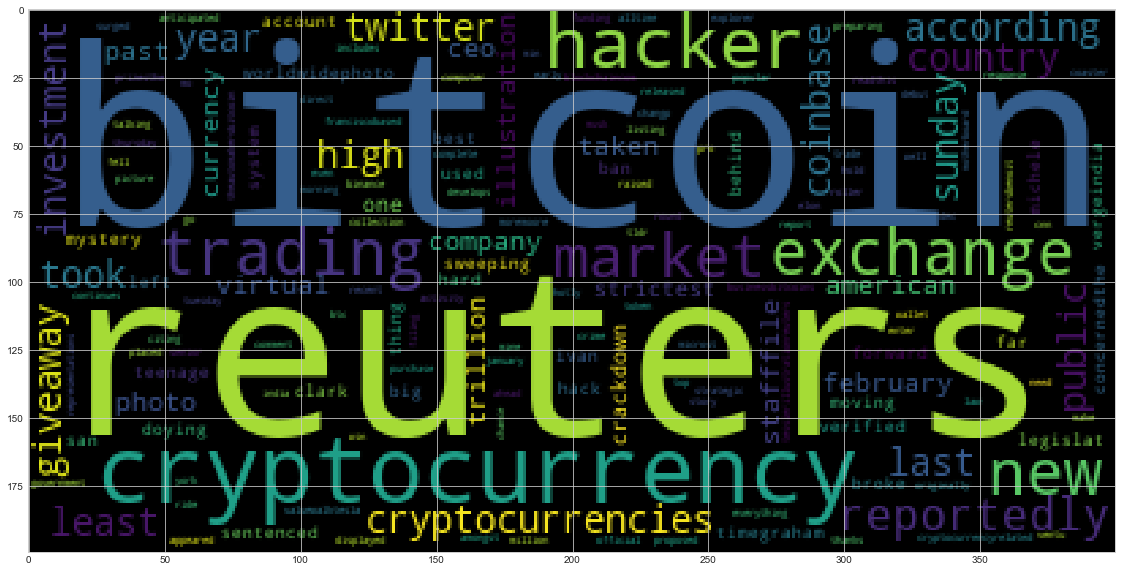

In [257]:
# Generate the Bitcoin word cloud
btc_wc = WordCloud().generate(btc_big_string)
plt.imshow(btc_wc)

In [258]:
# Convert a list of tokens into a single string of tokens
eth_big_string = ' '.join([str(elem) for elem in eth_flat_word_tokenized_list ])
print(eth_big_string)

famed auction house christies sold first purely digital piece art whopping million price buyer got digital file collage image complex legac one strictest crackdown worldwidephoto michele doying vergeindia reportedly moving forward sweeping ban cryptocurrencies according reuters country legislat worried geforce rtx sold cryptocurrency miner snap every gpu sight nvidia think simple way help make new card unattractive crypto crowd heres everything need know nonfungible token latest cryptocurrency crazeread full story learn even nfts nfts latest cryptocurrency rage day band like kings leon releasing next album limited edition golden ticket nba digital collectible sold million nfts nonfungible token scarce digital content represented token driving new wave crypto adoptionthanks ethereum blockchain artist gaming company content cre first christies auction digital artwork backed nft nonfungible token still day away one notable sale world already taken place chris torres cr metamask one popula

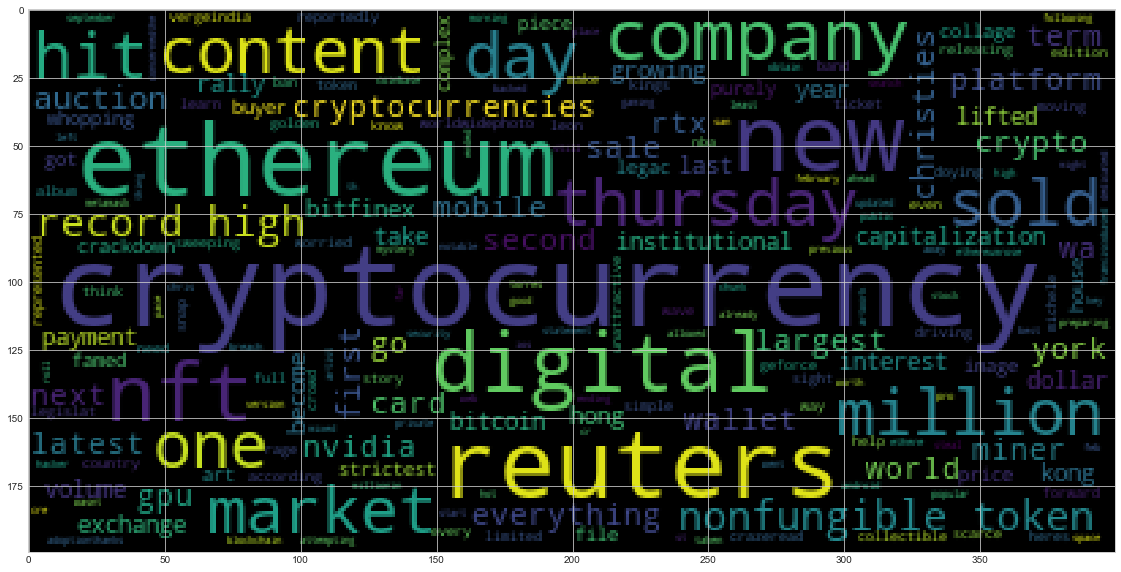

In [259]:
# Generate the Ethereum word cloud
eth_wc = WordCloud().generate(eth_big_string)
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [260]:
import spacy
from spacy import displacy

In [261]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [262]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [263]:
# Concatenate all of the Bitcoin text together

# Compile the list of lists of texts for each Bitcoin article
btc_text = []
for text in bitcoin_df.text:
    btc_text.append(text)
    
# Convert a list of texts into a single string of texts   
btc_text_string = ' '.join([str(elem) for elem in btc_text])
print(btc_text_string)

One of the strictest crackdowns worldwide
Photo by Michele Doying / The Verge
India is reportedly moving forward with a sweeping ban on cryptocurrencies. According to Reuters, the countrys legislat… [+1656 chars] The hacker behind last years big Twitter hack
 has just been sentenced to hard time.
Graham Ivan Clark, the teenage hacker who broke
 into Twitters systems, took over verified accounts, and used t… [+2552 chars] Some things are best left a mystery at least as far as Coinbase is concerned. 
The San Francisco-based cryptocurrency exchange has been preparing to go public since last year, and in a Thursday pros… [+1953 chars]  TL;DR: Enter the The Complete Bitcoin (BTC) Investment Giveaway for a chance to win over $12,000 in cryptocurrency-related prizes.
The Bitcoin Investment Giveaway includes everything you need to get… [+1641 chars] New York (CNN Business)Bitcoin's roller coaster ride continues. The top cryptocurrency surged to a new all-time high above $58,000 on Sunday but f

In [264]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_text_string)

In [265]:
# Add a title to the document
btc_doc.user_data["title"] = "Bitcoin NER"

In [266]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [267]:
# List all Entities
# Get geopolitical and organizational entities
btc_entities = [ent.text for ent in btc_doc.ents if ent.label_ in ['GPE', 'ORG','PERSON','MONEY']]
print(btc_entities)

['Photo', 'Michele Doying', 'India', 'Reuters', 'Graham Ivan Clark', 'San Francisco', 'over $12,000', 'New York', 'CNN', 'above $58,000', 'just above $46,000', 'India', 'Reuters', 'Blockchain.com', '$120 million', 'Moore Strategic Ventu', 'Elon Musk', 'Binance', 'Changp', 'Reuters', 'Benoit Tessier/Illustration', 'Reuters', 'Reuters', 'Bitcoin', 'Reuters', 'Reuters', 'Reuters', '$1 trillion', 'Reuters', 'Pristina', 'Kosovo', 'HONG KONG', 'Reuters Breakingviews', 'Bitcoin', 'past $56,000', '$1 trillion', 'The U.S. Department of Justice', 'Lazarus', 'DPKR', 'a billion dollars', 'Bitcoin']


---

### Ethereum NER

In [268]:
# Concatenate all of the Ethereum text together

# Compile the list of lists of texts for each Bitcoin article
eth_text = []
for text in ethereum_df.text:
    eth_text.append(text)
    
# Convert a list of texts into a single string of texts   
eth_text_string = ' '.join([str(elem) for elem in eth_text])
print(eth_text_string)

Famed auction house Christies just sold its first purely digital piece of art for a whopping $69 million. For that price, the buyer got a digital file of a collage of 5,000 images and a complex legac… [+12891 chars] One of the strictest crackdowns worldwide
Photo by Michele Doying / The Verge
India is reportedly moving forward with a sweeping ban on cryptocurrencies. According to Reuters, the countrys legislat… [+1656 chars] Worried that the GeForce RTX 3060 will be sold out as cryptocurrency miners snap up every GPU in sight? NVIDIA thinks it has a simple way to help: make the new card unattractive to the crypto crowd. … [+1652 chars] Here's everything you need to know about non-fungible tokens, the latest cryptocurrency craze.
Read the full story here. (And learn even more about NFTs here.) NFTs are the latest cryptocurrency rage these days, with bands like Kings of Leon releasing their next album as limited edition "golden tickets," and NBA digital collectibles being sold for millio

In [269]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_text_string)

# Add a title to the document
# YOUR CODE HERE!
eth_doc.user_data["title"] = "Ethereum NER"

In [270]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [271]:
# List all Entities
eth_entities = [ent.text for ent in eth_doc.ents if ent.label_ in ['GPE', 'ORG','PERSON','MONEY']]
print(eth_entities)

['Christies', '$69 million', 'Photo', 'Michele Doying', 'India', 'Reuters', 'GeForce', '3060', 'GPU', 'Kings', 'NBA', 'Ethereum', "Christie's", 'NFT', 'Chris Torres', 'Ethereum', 'about $5.7 million', 'GPU', 'Nvidia', 'NEW YORK', 'Reuters', 'NEW YORK', 'Reuters', 'Ethereum ended', '1,935.57', 'San Francisco', 'Bitfinex', 'Bitfinex', 'millions of dollars', 'Reuters', 'SINGAPORE', 'Reuters', '$1 trillion', 'World FX', 'Kevin Buckland', 'Reuters', 'Meitu', 'Hong Kong', 'China', 'Bobby Yip', 'HONG KONG', 'Reuters', 'Hong Ko', 'Ethereum']


---